<div style="background: #f9f9f9; padding: 20px; border: 1px solid #e2e2e2; border-radius: 5px; text-align: center;">
    <h2 style="color: #1a1a1a; font-size: 28px; margin-bottom: 10px;">Assignment: Time Series Forecasting with PyTorch</h2>
    <p style="color: #333; font-size: 16px;"><strong>Objective:</strong> In this assignment, you will implement time series forecasting using PyTorch. You will follow the structure of the <a href="https://www.tensorflow.org/tutorials/structured_data/time_series" target="_blank" style="color: #4b8bf4; text-decoration: none;">TensorFlow tutorial</a> on time series forecasting while adapting the code to PyTorch. Additionally, you will write a report to explain the steps and concepts involved in the task.</p>
</div>

<div style="background: #f2f2f2; padding: 20px; border: 1px solid #e2e2e2; border-radius: 5px; margin-top: 20px;">
    <h3 style="color: #1a1a1a; font-size: 24px; margin-bottom: 15px;">Instructions</h3>
    <ol>
        <li>
            <p><strong style="color: #333;">Data Preprocessing (35 points):</strong></p>
            <ul>
                <li style="color: #444;">Load the time series dataset.</li>
                <li style="color: #444;">Preprocess the data, including normalizing it and splitting it into training and validation sets.</li>
                <li style="color: #444;">Implement data augmentation if necessary.</li>
            </ul>
        </li>
        <br>
        <li>
            <p><strong style="color: #333;">Model Architecture (15 points):</strong></p>
            <ul>
                <li style="color: #444;">Design a PyTorch model for time series forecasting. You can use RNN, LSTM, or GRU layers.</li>
                <li style="color: #444;">Train your model on the training data.</li>
                <li style="color: #444;">Implement appropriate loss functions and optimizers.</li>
            </ul>
        </li>
        <br>
        <li>
            <p><strong style="color: #333;">Training and Evaluation (10 points):</strong></p>
            <ul>
                <li style="color: #444;">Train the model on the training data for a specified number of epochs.</li>
                <li style="color: #444;">Evaluate the model on the validation data.</li>
                <li style="color: #444;">Monitor and report the training progress (e.g., loss and metrics).</li>
            </ul>
        </li>
        <br>
        <li>
            <p><strong style="color: #333;">Hyperparameter Tuning (15 points):</strong></p>
            <ul>
                <li style="color: #444;">Experiment with different hyperparameters (e.g., learning rate, batch size, number of layers) and report your findings.</li>
                <li style="color: #444;">Discuss the impact of hyperparameter changes on model performance.</li>
            </ul>
        </li>
    </ol>
</div>

<div style="background: #f2f2f2; padding: 20px; border: 1px solid #e2e2e2; border-radius: 5px; margin-top: 20px;">
    <h3 style="color: #1a1a1a; font-size: 24px; margin-bottom: 15px;">Submission</h3>
    <p style="color: #333; font-size: 16px;">Submit your PyTorch code along with the report in a single ZIP file.</p>
</div>

<div style="background: #f2f2f2; padding: 20px; border: 1px solid #e2e2e2; border-radius: 5px; margin-top: 20px;">
    <h3 style="color: #1a1a1a; font-size: 24px; margin-bottom: 15px;">Grading</h3>
    <p style="color: #333; font-size: 16px;">Your assignment will be graded based on the following criteria:</p>
    <ul>
        <li style="color: #444;">Data preprocessing (35 points)</li>
        <li style="color: #444;">Model architecture (15 points)</li>
        <li style="color: #444;">Training and evaluation (10 points)</li>
        <li style="color: #444;">Hyperparameter tuning (15 points)</li>
        <li style="color: #444;">Report (25 points)</li>
    </ul>
</div>

<div style="background: #f2f2f2; padding: 20px; border: 1px solid #e2e2e2; border-radius: 5px; margin-top: 20px;">
    <h3 style="color: #1a1a1a; font-size: 24px; margin-bottom: 15px;">Note</h3>
    <p style="color: #333; font-size: 16px;">Ensure that your PyTorch code is well-documented, and the report is clear and concise, describing the steps you took and the insights you gained during the assignment.</p>
</div>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import zipfile

import torch
from torchvision.datasets.utils import download_and_extract_archive
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

import warnings

warnings.filterwarnings("ignore")


# 1- Data Preprocessing

> **Read csv file than contains data from Jan 10, 2009 - December 31, 2016**


In [3]:
url = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip'
filename = 'jena_climate_2009_2016.csv.zip'

# Specify the directory where you want to save the data
root = './data'

# Create the directory if it doesn't exist
os.makedirs(root, exist_ok=True)

# Download the file
response = requests.get(url)
file_path = os.path.join(root, filename)

with open(file_path, 'wb') as f:
    f.write(response.content)

# Extract the contents of the zip file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(root)

# Get the path to the extracted CSV file
csv_path = os.path.join(root, 'jena_climate_2009_2016.csv')

In [4]:
df = pd.read_csv(csv_path)
# df = df[5::6]

In [ ]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


> **Here we see the statistics of the dataset , and in `wv (m/s)` and `max. wv (m/s)` it appears that the minimum value  = -9999.000 and it's likely erroneous so i will replace all values that lower than zero to zero**

In [5]:
# map all values less than zero to be zero
df['wv (m/s)'] =df['wv (m/s)'].map(lambda x : 0 if x < 0 else x)
df['max. wv (m/s)'] =df['wv (m/s)'].map(lambda x : 0 if x < 0 else x)
df['wv (m/s)'].min()

0.0

>**As i see that the angles don't make a good model so we can make**


1.   Categorical Encoding by convert each direction to ("East" , "north"...)
2.   Circular Encoding:one for the sine and one for the cosine of the angle

So here to make it more meaningful and interpretable way for a machine learning model i will convert wind direction and velocity columns to a wind vector using circular encoding


In [6]:
wv = df.pop("wv (m/s)")
max_wv = df.pop("max. wv (m/s)")
radians = df.pop('wd (deg)')*np.pi / 180
df['Wx'] = wv * np.cos(radians)
df['Wy'] = wv * np.sin(radians)

df['max Wx'] = max_wv * np.cos(radians)
df['max Wy'] = max_wv * np.sin(radians)

In [7]:
df['Date Time'] = pd.to_datetime(df['Date Time'])
date_time = df.pop('Date Time')
date_time.head()

0   2009-01-01 00:10:00
1   2009-01-01 00:20:00
2   2009-01-01 00:30:00
3   2009-01-01 00:40:00
4   2009-01-01 00:50:00
Name: Date Time, dtype: datetime64[ns]

`Year sin` and `Year cos` capture the time of year periodicity. Similar to the daily components, these features represent the cyclic nature of the year. They allow the model to capture seasonal patterns in the data.

for handling periodicity in time-related features, specifically for capturing `hourly` ,`daily` ,and `yearly` patterns using sine and cosine transforms

In [8]:
# get total seconds
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [9]:
hour = 60*60
day = 24*hour
year = (365.2425)*day

df['hour sin'] = np.sin(timestamp_s * (2 * np.pi / hour))
df['hour cos'] = np.cos(timestamp_s * (2 * np.pi / hour))
df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

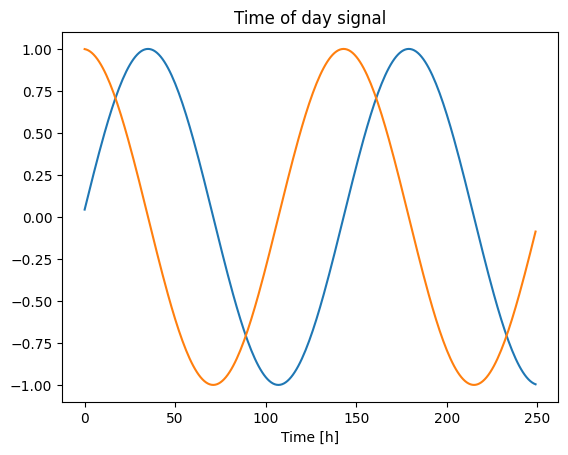

In [ ]:
plt.plot(np.array(df['Day sin'])[:250])
plt.plot(np.array(df['Day cos'])[:250])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

## Split data into train and validate datasets (0.8 ,0.2)

In [10]:
n = len(df)

train_data = df[:int(n*0.75)]
val_data = df[int(n*0.75):]


## Normalize both train and validate datasets

In [11]:
train_mean = train_data.mean()
train_std = train_data.std()

train_data = (train_data - train_mean) / train_std
val_data = (val_data - train_mean) / train_std

# 2- Model Architecture

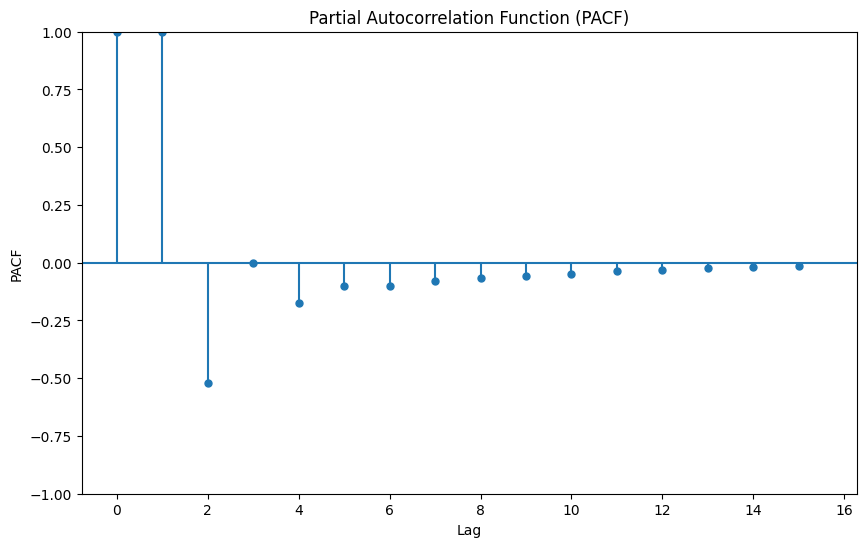

[1, 2]


In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt


max_lag = 15 # Adjust as needed

# Calculate the PACF
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(df['T (degC)'], lags=max_lag, ax=ax)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

from statsmodels.tsa.stattools import pacf
max_lag = 10
    # Calculate PACF values
pacf_values = pacf(df['T (degC)'], nlags=max_lag)

    # Extract features based on significant PACF values
significant_lags = [lag for lag, pacf_value in enumerate(pacf_values) if abs(pacf_value) > 0.2]
significant_lags = significant_lags[1:]
print(significant_lags)

> from above plot i will use 2 lags as a features

In [ ]:
best_window = 0
best_mse = float('inf')
from sklearn.metrics import mean_squared_error
for window_size in range(2, 10):
        # Calculate the moving average
      moving_avg = train_data.rolling(window=window_size).mean().dropna()

        # Use the moving average to predict on the validation set
      predictions = moving_avg[-len(val_data):]

        # Calculate Mean Squared Error
      mse = mean_squared_error(val_data, predictions)

        # Update best parameters if the error is lower
      if mse < best_mse:
          best_mse = mse
          best_window = window_size

print(best_window)

5


> i will use 5 as my window average feature

In [12]:
def lag_features(data, lags):
      lagged_df = data.copy()
      for lag in range(1, lags + 1):
          lagged_df[f'lag_{lag}'] = lagged_df['T (degC)'].shift(lag)
      return lagged_df.dropna()

def rolling_average(data, window_size):
      rolled_df = data.copy()
      rolled_df['rolling_avg'] = data['T (degC)'].rolling(window=window_size).mean()
      return rolled_df.dropna()

def preprocess_data(data):
      df_lagged = lag_features(data, lags=2)

      df_rolled = rolling_average(df_lagged, window_size=5)

      return df_rolled

df_train = preprocess_data(train_data)
df_val = preprocess_data(val_data)


> **The WindowGenerator class appears to be a utility class designed to generate input-output pairs (windows) from time series data, which is particularly useful when working with recurrent neural networks (RNNs).**

>**This is crucial for training a model to predict future values based on historical observations**


In [13]:
class LSTMModel(nn.Module):
      # input_size : number of features in input at each time step
      # hidden_size : Number of LSTM units
      # num_layers : number of LSTM layers
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMModel, self).__init__() #initializes the parent class nn.Module
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, 1)
        self.dense = nn.Linear(hidden_size, output_size)

    def forward(self, x): # defines forward pass of the neural network
        out, _ = self.lstm(x)
        # out = self.linear(out)
        output = self.dense(out)
        return output

In [14]:
input_size = 24
hidden_size = 64  # Number of LSTM units
output_size = 1  # Single-step forecasting, adjust as needed
num_layers = 2  # Number of LSTM layers
learning_rate = 0.001

# Instantiate the LSTM model
model = LSTMModel(input_size, hidden_size, num_layers)
# loss_fn = torch.nn.MSELoss(reduction='mean')
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
print(model)

LSTMModel(
  (lstm): LSTM(24, 64, num_layers=2, batch_first=True)
  (linear): Linear(in_features=64, out_features=1, bias=True)
  (dense): Linear(in_features=64, out_features=1, bias=True)
)


In [ ]:
df_train.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,max Wy,hour sin,hour cos,Day sin,Day cos,Year sin,Year cos,lag_1,lag_2,rolling_avg
6,0.918285,-1.967567,-2.025138,-1.881209,1.127007,-1.301274,-1.454412,-0.790690,-1.455265,-1.459789,...,0.290019,1.224727,0.707111,0.425344,1.349087,-0.024964,1.409505,-2.018511,-2.044575,-2.030595
7,0.918285,-1.967567,-2.025138,-1.889992,1.102764,-1.301274,-1.456821,-0.788550,-1.459060,-1.462169,...,0.370339,1.224727,-0.707103,0.483773,1.329254,-0.024795,1.409503,-1.967567,-2.018511,-2.009507
8,0.918285,-2.001924,-2.059185,-1.944157,1.066399,-1.311973,-1.480914,-0.784268,-1.481832,-1.485967,...,0.236338,-0.000015,-1.414209,0.541280,1.306892,-0.024627,1.409501,-1.967567,-1.967567,-2.000029
9,0.921878,-2.063531,-2.121407,-2.033455,1.023974,-1.329358,-1.517053,-0.782128,-1.515989,-1.519284,...,0.229879,-1.224756,-0.707103,0.597758,1.282042,-0.024459,1.409500,-2.001924,-1.967567,-2.003820
10,0.932657,-2.102627,-2.160150,-2.080300,1.023974,-1.341394,-1.533918,-0.782128,-1.534966,-1.538322,...,0.246807,-1.224756,0.707111,0.653098,1.254753,-0.024290,1.409498,-2.063531,-2.001924,-2.020643


In [15]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class WindowGenerator(Dataset):
    def __init__(self, data, input_width, label_width, shift, label_columns=None):
        self.data = data
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        self.label_columns = label_columns

        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(data.columns)}

        self.total_window_size = input_width + shift

    def __len__(self):
        return len(self.data) - self.total_window_size + 1

    def __getitem__(self, idx):
        window_slice = slice(idx, idx + self.total_window_size)
        window_data = self.data.iloc[window_slice]

        inputs = window_data.iloc[:-self.shift]
        labels = window_data.iloc[-self.label_width:]

        if self.label_columns is not None:
            labels = torch.stack([torch.tensor(labels.iloc[:, self.column_indices[name]].values, dtype=torch.float32)
                                 for name in self.label_columns], dim=-1)

        inputs = torch.tensor(inputs.values, dtype=torch.float32)
        # print(labels)
        # labels = torch.tensor(labels[label_columns].values, dtype=torch.float32)

        return inputs, labels



# Choose appropriate values for input_width, label_width, and shift
input_width = 1
label_width = 1
shift = 1

# Specify the target variable column (change 'value' to your actual target column name)
label_columns = ['T (degC)']

window_generator = WindowGenerator(train_data, input_width, label_width, shift, label_columns)

# Create DataLoader for training
batch_size = 32
train_dataloader = DataLoader(window_generator, batch_size=batch_size, shuffle=True, num_workers=4)

window_generator = WindowGenerator(val_data, input_width, label_width, shift, label_columns)

# Create DataLoader for training
batch_size = 32
val_dataloader = DataLoader(window_generator, batch_size=batch_size, shuffle=True , num_workers=4)

# 3- Training and Evaluation

In [ ]:
# train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
num_epochs = 10
for epoch in range(num_epochs):
    model.train()

    for inputs, labels in train_dataloader:
        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_dataloader:
            outputs = model(inputs)
            val_loss += criterion(outputs, labels)

    # Average validation loss
    avg_val_loss = val_loss / len(val_dataloader)

    # Print training progress
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}, Validation Loss: {avg_val_loss.item()}')

Epoch 1/10, Loss: 0.00032407912658527493, Validation Loss: 0.0007652848726138473
Epoch 2/10, Loss: 0.0006586755043826997, Validation Loss: 0.0007162044639699161
Epoch 3/10, Loss: 0.0008045391878113151, Validation Loss: 0.0008528871112503111
Epoch 4/10, Loss: 0.0006397605175152421, Validation Loss: 0.0007104392861947417
Epoch 5/10, Loss: 0.0007812885451130569, Validation Loss: 0.0007048794650472701
Epoch 6/10, Loss: 0.0004885534872300923, Validation Loss: 0.0007040206110104918
Epoch 7/10, Loss: 0.0007676641689613461, Validation Loss: 0.0007429843535646796
Epoch 8/10, Loss: 0.0009312559850513935, Validation Loss: 0.0010632844641804695
Epoch 9/10, Loss: 0.0008973919902928174, Validation Loss: 0.0007098704227246344
Epoch 10/10, Loss: 0.0006326081929728389, Validation Loss: 0.0006960871978662908


# 4- Hyperparameter Tuning

In [18]:
learning_rates = [0.01, 0.001]
batch_sizes = [32, 64]
hidden_sizes = [64, 128]
best_model = None
best_val_loss = float('inf')

for lr in learning_rates:
    for batch_size in batch_sizes:
        for hidden_size in hidden_sizes:
            input_size = 23
            # hidden_size = hidden_size
            output_size = 1
            # batch_size = 32
            # learning_rate = 0.001

            # Instantiate the model, loss function, and optimizer
            model = LSTMModel(input_size, hidden_size, output_size)
            criterion = nn.MSELoss()
            optimizer = optim.Adam(model.parameters(), lr=learning_rate)

            num_epochs = 5
            for epoch in range(num_epochs):
                model.train()
                total_loss = 0.0

                for inputs, labels in train_dataloader:
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()
                    total_loss += loss.item()

                average_loss = total_loss / len(train_dataloader)
                print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {average_loss}")

            model.eval()
            val_loss = 0.0

            with torch.no_grad():
                for val_inputs, val_labels in val_dataloader:
                    val_outputs = model(val_inputs)
                    val_loss += criterion(val_outputs, val_labels).item()

            average_val_loss = val_loss / len(val_dataloader)
            print(f"Validation Loss: {average_val_loss}")


            if average_val_loss < best_val_loss:
                best_val_loss = average_val_loss
                best_model = model
                best_hyperparameters = {'lr': lr, 'batch_size': batch_size, 'hidden_size': hidden_size}

print(f"Best Hyperparameters: {best_hyperparameters}")

Epoch 1/5, Training Loss: 0.004252288102932044
Epoch 2/5, Training Loss: 0.0007630404885443043
Epoch 3/5, Training Loss: 0.0007390118434704409
Epoch 4/5, Training Loss: 0.0007219454861614995
Epoch 5/5, Training Loss: 0.000711874193328015
Validation Loss: 0.000670961096534885
Epoch 1/5, Training Loss: 0.003037716439615158
Epoch 2/5, Training Loss: 0.0007758866946707426
Epoch 3/5, Training Loss: 0.0007498360921996986
Epoch 4/5, Training Loss: 0.0007322442927612146
Epoch 5/5, Training Loss: 0.0007178103000312428
Validation Loss: 0.0007382722530874372
Epoch 1/5, Training Loss: 0.004279174053959434
Epoch 2/5, Training Loss: 0.0007596790454837781
Epoch 3/5, Training Loss: 0.000735282941402711
Epoch 4/5, Training Loss: 0.0007202435200869076
Epoch 5/5, Training Loss: 0.0007082735424215589
Validation Loss: 0.0007472896801485078
Epoch 1/5, Training Loss: 0.003284481661518484
Epoch 2/5, Training Loss: 0.0007793375346330005
Epoch 3/5, Training Loss: 0.0007487905012289347
Epoch 4/5, Training Loss: 


<div style="background: #f9f9f9; padding: 20px; border: 1px solid #e2e2e2; border-radius: 5px; margin-top: 20px;">
        <h3 style="color: #4b8bf4; font-size: 24px;">Complete guides for time-series forecasting using deep learning:</h3>
    <br>
    <br>
<a style="background: #1; font-size: 20px;" href="https://www.kaggle.com/code/dimitreoliveira/deep-learning-for-time-series-forecasting" target="_blank">
            Deep Learning for Time Series Forecasting
        </a>
    <br>
    <br>
<a style="background: #1; font-size: 20px;" href="https://www.kaggle.com/code/dimitreoliveira/time-series-forecasting-with-lstm-autoencoders/notebook
" target="_blank">
            Time-series forecasting with LSTM autoencoders
        </a>
    <br>
    <br>
    <a style="background: #1; font-size: 20px;" href="https://bhadreshpsavani.medium.com/tutorial-on-sentimental-analysis-using-pytorch-b1431306a2d7
" target="_blank">
    Tutorial on Sentimental Analysis using Pytorch for Beginners
        </a>

</div>

